In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
movies_df = pd.read_csv(r"D:/.vscode/python/internship_2/IMDb Movies India.csv", encoding='ISO-8859-1')

#display first few rows of the dataset
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
movies_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [4]:
movies_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
movies_df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [6]:
#clean 'year' column by removing non-numeric characters
movies_df['Year'] = movies_df['Year'].astype(str).str.extract('(\d{4})').astype(float)

#clean 'votes' column by removing commas, dollar signs, and 'M'
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').str.replace('$', '').str.replace('M', '').astype(float)

#clean 'duration' column by removing min' suffix and converting to numeric
movies_df['Duration'] = movies_df['Duration'].str.replace('min', '').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_8300\2436266768.py:2: SyntaxWarning: invalid escape sequence '\d'
  movies_df['Year'] = movies_df['Year'].astype(str).str.extract('(\d{4})').astype(float)


In [7]:
#handle missing values : drop rows with missing 'duration'
movies_df.dropna(subset=['Duration'], inplace=True)

In [8]:
#fill missing values in other columns with a placeholder or appropriate value
movies_df['Year'].fillna(movies_df['Year'].median(), inplace=True)
movies_df['Votes'].fillna(movies_df['Votes'].median(), inplace=True)
movies_df['Rating'].fillna(movies_df['Rating'].median(), inplace=True)
movies_df['Genre'].fillna('Unknown', inplace=True)
movies_df['Director'].fillna('Unknown', inplace=True)
movies_df['Actor 1'].fillna('Unknown', inplace=True)
movies_df['Actor 2'].fillna('Unknown', inplace=True)
movies_df['Actor 3'].fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8300\2529113334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df['Year'].fillna(movies_df['Year'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8300\2529113334.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
movies_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.1,119.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.1,119.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015.0,115.0,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001.0,153.0,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989.0,125.0,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999.0,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [10]:
#convert 'year' and 'votes' to numeric types
movies_df['Year'] = movies_df['Year'].astype(float)
movies_df['Votes'] = movies_df['Votes'].astype(float)

In [11]:
#confirm data types are handled
movies_df.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [12]:
#confirm missing values are handled
movies_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

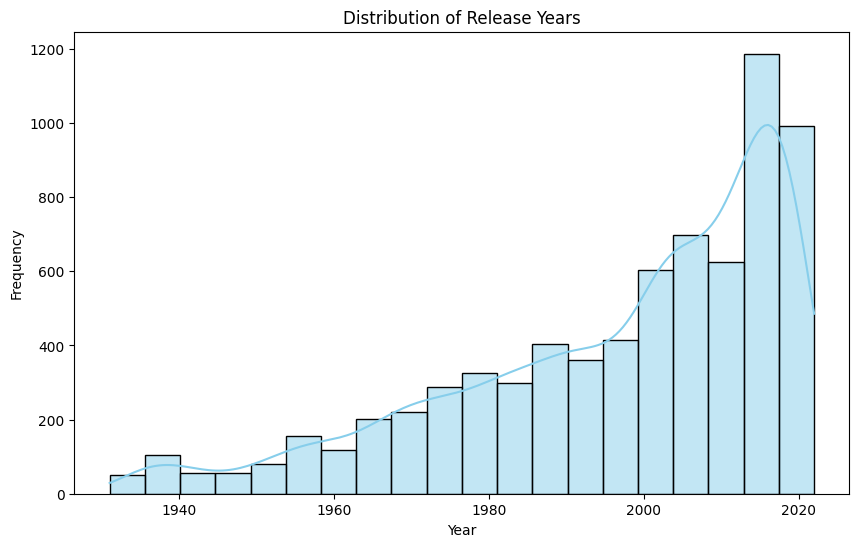

In [13]:
#distribution of release years
plt.figure(figsize=(10,6))
sns.histplot(movies_df['Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

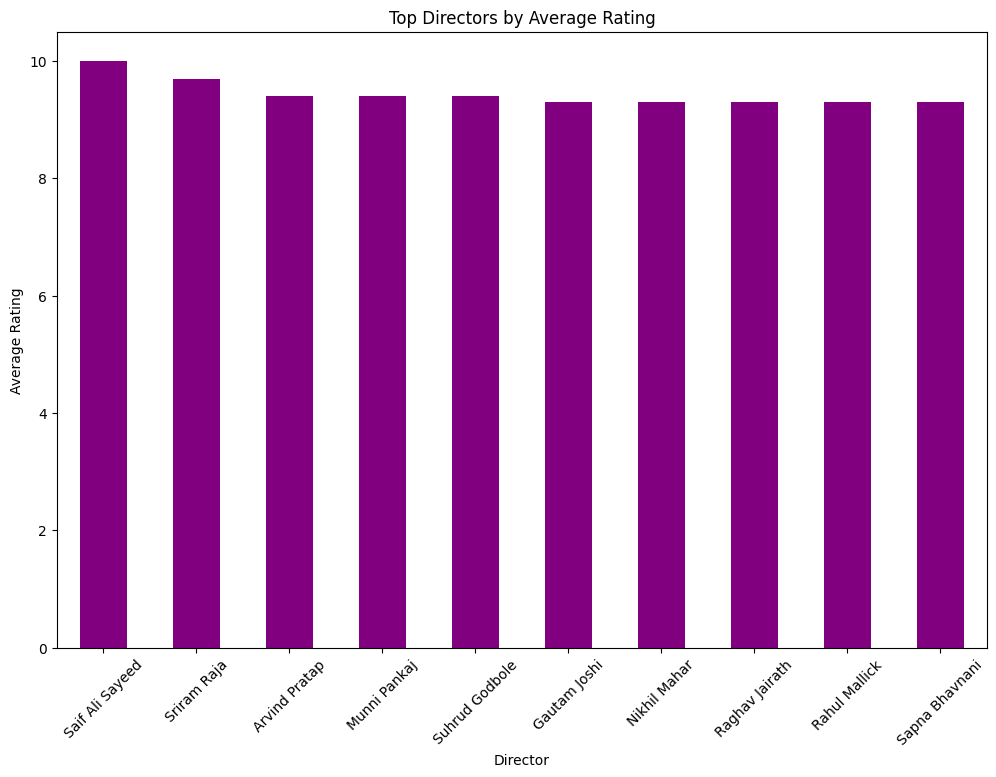

In [14]:
#top directors by average rating
top_directors = movies_df.groupby('Director')['Rating'].mean().nlargest(10)
plt.figure(figsize=(12,8))
top_directors.plot(kind='bar', color='purple')
plt.title("Top Directors by Average Rating")
plt.xlabel("Director")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

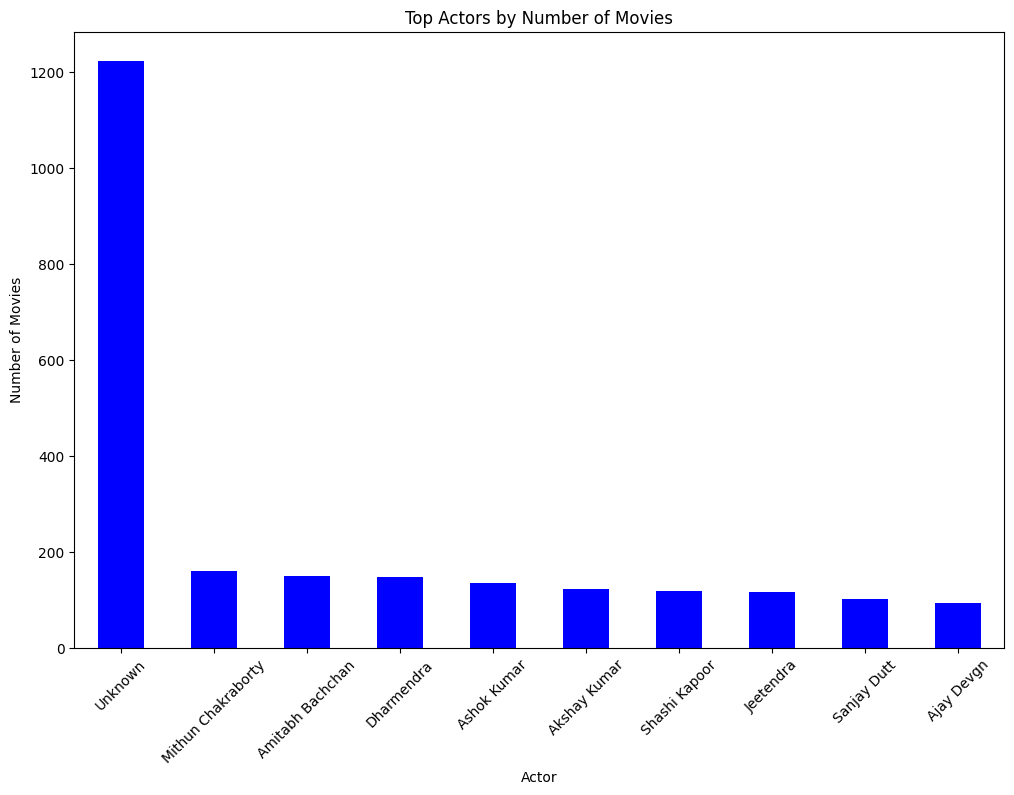

In [15]:
#top Actors by number of movies
top_actors = pd.concat([movies_df['Actor 1'],movies_df['Actor 2'],movies_df['Actor 3']]).value_counts().nlargest(10)
plt.figure(figsize=(12,8))
top_actors.plot(kind='bar', color='blue')
plt.title('Top Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

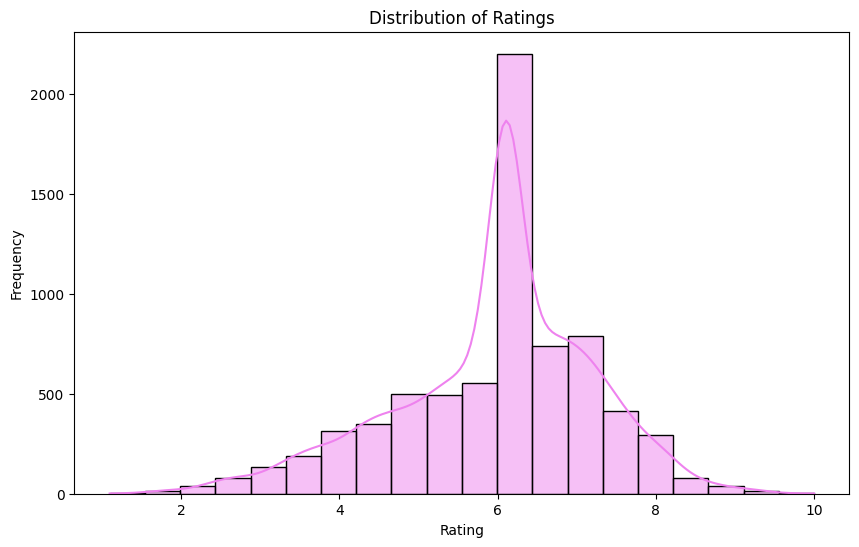

In [16]:
#Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(movies_df['Rating'], bins=20, kde=True, color='violet')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [17]:
#feature engineering 
movies_df = pd.get_dummies(movies_df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

In [18]:
#model selection
x = movies_df.drop(['Rating', 'Name'], axis=1)
y = movies_df['Rating']

In [19]:
#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
X_train

,Year,Duration,Votes,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy",...,Actor 3_Zayed Khan,Actor 3_Zeb Rehman,Actor 3_Zeba Rizvi,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zulfi Sayed
13501,1971.0,180.0,31.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13355,2012.0,141.0,9060.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3174,1989.0,165.0,126.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14569,2021.0,83.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5079,1997.0,120.0,27.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,1955.0,150.0,16.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11103,1968.0,155.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11181,1982.0,137.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11618,2004.0,162.0,608.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X_test

,Year,Duration,Votes,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy",...,Actor 3_Zayed Khan,Actor 3_Zeb Rehman,Actor 3_Zeba Rizvi,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zubeida,Actor 3_Zulfi Sayed
1023,1975.0,110.0,30.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9275,1985.0,164.0,1210.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7883,2018.0,65.0,41.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4425,1993.0,130.0,186.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8069,2005.0,119.0,39.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14342,2016.0,147.0,119.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14270,2011.0,133.0,133.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3974,1967.0,171.0,117.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4311,2019.0,98.0,1247.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
Y_train

13501    6.5
13355    4.0
3174     2.3
14569    6.1
5079     5.4
        ... 
7914     6.5
11103    6.1
11181    6.1
11618    3.7
1792     3.2
Name: Rating, Length: 5792, dtype: float64

In [23]:
Y_test

1023     5.1
9275     7.3
7883     8.5
4425     3.4
8069     3.4
        ... 
14342    6.1
14270    4.4
3974     6.9
4311     7.4
1796     6.1
Name: Rating, Length: 1448, dtype: float64

In [24]:
#initialize the linear regression model
model = LinearRegression()

In [25]:
#train the model
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
#evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error:",mse)


Mean Squared Error: 4723095869049.076


In [27]:
#display coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-5.07503509e-02  9.23594609e-03  6.61338171e-05 ... -7.29132643e+05
 -6.66648023e+05 -5.42600410e+04]
Intercept: 116023.87066321088


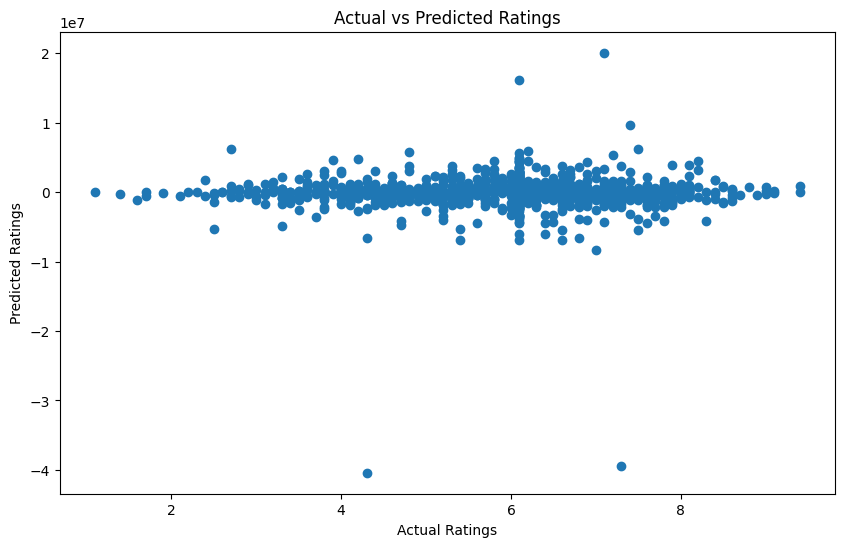

In [28]:
#visualize actual vs predicted ratings
plt.figure(figsize=(10,6))
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

In [29]:
#predictions for new data
new_data = X_test.copy()
new_predictions = model.predict(new_data)

In [32]:
#display the predicted ratings for the new movies
print("Predicted Ratings:", new_predictions)


Predicted Ratings: [ 4.94001001e+04  1.91324120e+00  7.93619102e+05 ...  5.22528982e+00
 -5.52162358e+05  6.16674221e+04]
